
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


## Importing the Libraries

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [4]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

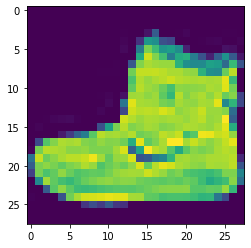

In [9]:
plt.imshow(x_train[0]);

In [10]:
y_train[0]

9

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [11]:
x_train[0].min()

0

In [12]:
x_train[0].max()

255

In [13]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
X_train[0].min()

0.0

In [15]:
X_train[0].max()

1.0

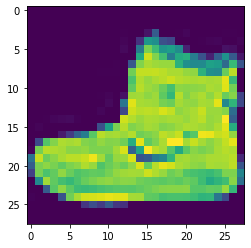

In [16]:
plt.imshow(X_train[0]);

**Reshape the X into 4 dimension**

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [20]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [23]:
y_train[0]

9

In [24]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [26]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

2022-03-18 12:25:15.609775: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [30]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3860 - accuracy: 0.8633 - val_loss: 0.3322 - val_accuracy: 0.8798
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2624 - accuracy: 0.9053 - val_loss: 0.2942 - val_accuracy: 0.8947
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2237 - accuracy: 0.9199 - val_loss: 0.2719 - val_accuracy: 0.9044
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2022 - accuracy: 0.9275 - val_loss: 0.2593 - val_accuracy: 0.9062
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1858 - accuracy: 0.9334 - val_loss: 0.2708 - val_accuracy: 0.9084
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1709 - accuracy: 0.9394 - val_loss: 0.2831 - val_accuracy: 0.9061


**Plot values of metrics you used in your model.**

In [33]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.386012,0.863283,0.332159,0.8798
1,0.262423,0.905300,0.294246,0.8947
2,0.223682,0.919867,0.271923,0.9044
3,0.202205,0.927467,0.259299,0.9062
4,0.185799,0.933350,0.270796,0.9084


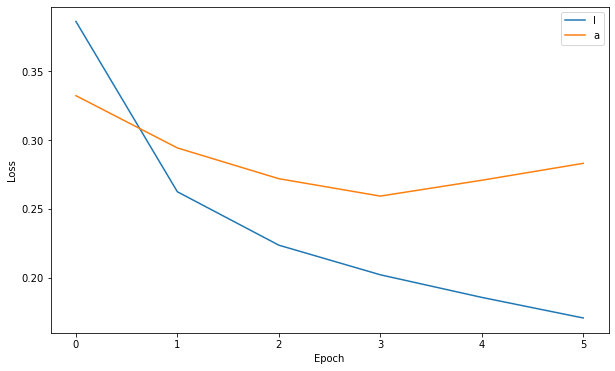

In [35]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

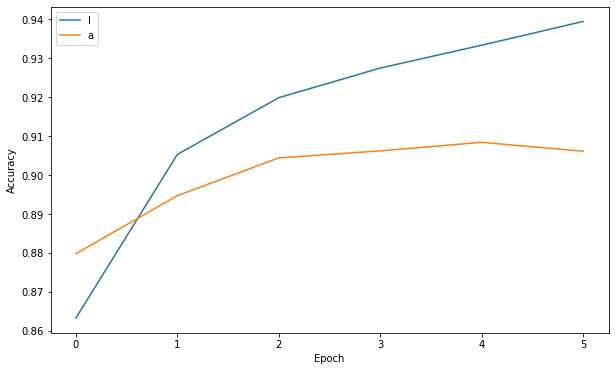

In [36]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [32]:
model.metrics_names

['loss', 'accuracy']

In [37]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 4ms/step - loss: 0.2831 - accuracy: 0.9061
[0.28306904435157776, 0.9060999751091003]


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
preds = model.predict(X_test)
preds

array([[5.9366734e-08, 1.8149463e-12, 3.6470760e-09, ..., 1.3796095e-04,
        2.1618073e-08, 9.9971610e-01],
       [2.5619161e-06, 2.7394819e-16, 9.9996066e-01, ..., 1.6009932e-14,
        3.5812141e-12, 2.2384442e-15],
       [1.1538526e-07, 9.9999976e-01, 2.3071131e-10, ..., 1.0971968e-10,
        4.7304343e-09, 4.5734276e-12],
       ...,
       [2.9488676e-08, 1.5770793e-15, 9.5493576e-08, ..., 2.5731348e-10,
        9.9999678e-01, 2.7573263e-12],
       [3.5693621e-09, 9.9999917e-01, 3.6625650e-11, ..., 1.6524065e-11,
        2.2371575e-10, 3.4466205e-10],
       [1.2672564e-04, 1.1168655e-07, 4.2736431e-04, ..., 2.3773532e-02,
        2.8420477e-03, 2.0639664e-03]], dtype=float32)

In [40]:
preds[0]

array([5.9366734e-08, 1.8149463e-12, 3.6470760e-09, 2.5939237e-10,
       1.0576070e-09, 1.4567771e-04, 1.2645870e-07, 1.3796095e-04,
       2.1618073e-08, 9.9971610e-01], dtype=float32)

In [41]:
predictions= np.argmax(preds, axis=1)

In [42]:
len(predictions)

10000

In [43]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.92      0.77      0.84      1000
           3       0.92      0.90      0.91      1000
           4       0.75      0.95      0.84      1000
           5       0.95      0.99      0.97      1000
           6       0.78      0.73      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [45]:
print(confusion_matrix(y_test, predictions))

[[860   0  13  11  11   4  95   0   6   0]
 [  3 972   1  16   4   0   3   0   1   0]
 [ 12   0 772   8 145   1  60   0   2   0]
 [ 17   5   8 895  39   0  31   0   5   0]
 [  1   0  14  14 950   1  20   0   0   0]
 [  0   0   0   0   0 987   0   8   0   5]
 [ 90   0  32  22 118   1 731   0   6   0]
 [  0   0   0   0   0  24   0 956   1  19]
 [  2   0   0   3   3   7   1   1 983   0]
 [  1   0   0   0   0  16   0  28   0 955]]


In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28306904435157776
Test accuracy: 0.9060999751091003


# Prediction

In [47]:
my_number = X_test[5]

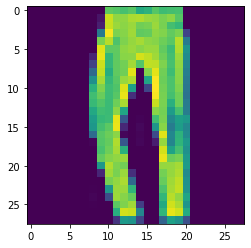

In [50]:
plt.imshow(my_number);

In [51]:
model.predict(my_number.reshape(1,28,28,1))

array([[7.39626842e-07, 9.99998808e-01, 8.48671622e-09, 1.45818376e-07,
        1.19703785e-08, 9.68799352e-09, 1.87780955e-07, 1.08820265e-10,
        1.43672978e-07, 5.78844394e-12]], dtype=float32)

In [52]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1])

In [53]:
my_number2 = X_test[20]

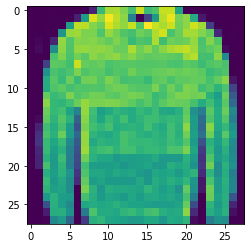

In [55]:
plt.imshow(my_number2);

In [56]:
model.predict(my_number2.reshape(1,28,28,1))

array([[1.4696381e-04, 1.3334556e-10, 9.9876851e-01, 4.0549033e-08,
        6.9370266e-04, 1.3569581e-07, 3.8865866e-04, 1.1966064e-10,
        1.9975205e-06, 1.6339227e-08]], dtype=float32)

In [57]:
np.argmax(model.predict(my_number2.reshape(1,28,28,1)), axis=1)

array([2])

# End of Assignment